In [6]:
# import packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# read min/max csv file
dfx = pd.read_csv('../csv_files/Capstone_p1_minmax.csv', index_col=0)
dfx.head()

,H_FTPct,H_EFGPct,H_ThreePARt,H_FTR,H_REBPct,H_BLKPct,H_AST_TOV_Ratio,A_FTPct,A_EFGPct,A_ThreePARt,A_FTR,A_REBPct,A_BLKPct,A_AST_TOV_Ratio
0,0.672228,0.357844,0.718132,0.601149,0.498663,0.265413,0.450610,0.907603,0.867653,0.864242,0.480322,0.501337,0.855860,0.598425
1,0.774289,0.272976,0.736725,0.499349,0.615201,0.176942,0.239790,0.749759,0.621326,0.758603,0.528431,0.384799,0.414273,0.639370
2,0.693817,0.715626,0.788988,0.765937,0.427610,0.558048,0.681435,0.874880,0.535157,0.721358,0.759112,0.572390,0.202294,0.489173
3,0.464181,0.651074,0.652064,0.539056,0.386152,0.386913,0.519858,0.441771,0.440452,0.842410,0.790470,0.613848,0.736733,0.460988
4,0.454367,0.497135,0.661054,0.379835,0.623700,0.172729,0.637369,0.626564,0.429460,0.969252,0.703116,0.376300,0.370873,0.937008


In [8]:
# exmaine skew for variables
dfx.skew()

H_FTPct           -0.248212
H_EFGPct           0.129838
H_ThreePARt        0.235915
H_FTR              0.434926
H_REBPct          -0.015225
H_BLKPct           0.448144
H_AST_TOV_Ratio    0.770964
A_FTPct           -0.249657
A_EFGPct           0.103065
A_ThreePARt        0.261402
A_FTR              0.438628
A_REBPct           0.015225
A_BLKPct           0.439742
A_AST_TOV_Ratio    0.786730
dtype: float64

## Checking the two variables that are skewed

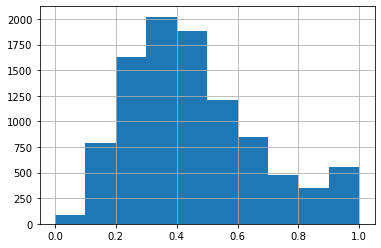

In [9]:
dfx['H_AST_TOV_Ratio'].hist()

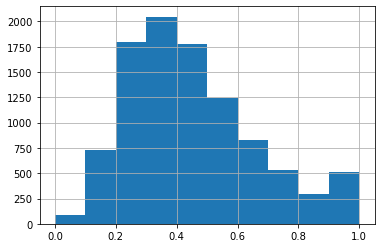

In [10]:
dfx['A_AST_TOV_Ratio'].hist()

## Fixing the skewness of the variables

In [11]:
# Taking the square root for the Home Assist to Turnover Ratio Since was orginally above 0.5
dfx['H_AST_TOV_Ratio'] = np.sqrt(dfx['H_AST_TOV_Ratio'])
dfx['H_AST_TOV_Ratio'].skew()

0.21052884928044116

In [12]:
# Taking the square root for the Away Assist to Turnover Ratio Since was orginally above 0.5
dfx['A_AST_TOV_Ratio'] = np.sqrt(dfx['A_AST_TOV_Ratio'])
dfx['A_AST_TOV_Ratio'].skew()

0.22301293144114764

In [13]:
# exmaine the variables now 
dfx.skew()

H_FTPct           -0.248212
H_EFGPct           0.129838
H_ThreePARt        0.235915
H_FTR              0.434926
H_REBPct          -0.015225
H_BLKPct           0.448144
H_AST_TOV_Ratio    0.210529
A_FTPct           -0.249657
A_EFGPct           0.103065
A_ThreePARt        0.261402
A_FTR              0.438628
A_REBPct           0.015225
A_BLKPct           0.439742
A_AST_TOV_Ratio    0.223013
dtype: float64

In [14]:
# Bringing in Target Variable to join datasets
dfy = pd.read_csv('../csv_files/TargetVariable_p1_Classification.csv', index_col=0)
dfy.head()

,Target
0,0
1,0
2,1
3,1
4,0


In [16]:
df_combined = pd.concat([dfx, dfy], axis=1)

In [17]:
df_combined

,H_FTPct,H_EFGPct,H_ThreePARt,H_FTR,H_REBPct,H_BLKPct,H_AST_TOV_Ratio,A_FTPct,A_EFGPct,A_ThreePARt,A_FTR,A_REBPct,A_BLKPct,A_AST_TOV_Ratio,Target
0,0.672228,0.357844,0.718132,0.601149,0.498663,0.265413,0.671275,0.907603,0.867653,0.864242,0.480322,0.501337,0.855860,0.773579,0
1,0.774289,0.272976,0.736725,0.499349,0.615201,0.176942,0.489684,0.749759,0.621326,0.758603,0.528431,0.384799,0.414273,0.799606,0
2,0.693817,0.715626,0.788988,0.765937,0.427610,0.558048,0.825491,0.874880,0.535157,0.721358,0.759112,0.572390,0.202294,0.699409,1
3,0.464181,0.651074,0.652064,0.539056,0.386152,0.386913,0.721012,0.441771,0.440452,0.842410,0.790470,0.613848,0.736733,0.678961,1
4,0.454367,0.497135,0.661054,0.379835,0.623700,0.172729,0.798354,0.626564,0.429460,0.969252,0.703116,0.376300,0.370873,0.967992,0
5,0.782139,0.607258,0.880747,0.564082,0.562318,0.453414,0.902017,0.333975,0.588336,0.808121,0.616232,0.437682,0.626647,0.846484,1
6,0.411187,0.633532,0.767056,0.164544,0.130817,0.439674,0.841644,0.593840,0.571030,0.713786,0.353729,0.869183,0.397364,0.742416,0
7,0.623160,0.396428,0.816080,0.457740,0.354036,0.711237,0.637027,0.358999,0.328426,0.794851,0.613331,0.645964,0.381781,0.503531,1
8,0.226693,0.366604,0.752865,0.713480,0.315972,0.259094,0.721012,0.749759,0.601218,0.530975,0.515258,0.684028,0.458137,0.759355,0
9,0.495584,0.569423,0.825699,0.698518,0.728643,0.333546,1.000000,0.538017,0.448413,0.657213,0.541980,0.271357,0.507934,0.610825,1


In [18]:
# export new dataframe to csv
df_combined.to_csv('../csv_files/Capstone_p1_final_Classification.csv')